In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv1D, GlobalMaxPooling2D

tf.logging.set_verbosity(tf.logging.ERROR)

In [2]:
# Data Processing
# This file has 11500 samples per class and 2 classes (Signal, Background)

categories = ["Background", "Signal"]
samples_class = 11500
dataset = "Ztraining_CollBack.csv"

In [3]:
# Loading data
print("\n Loading data from database file...")
features = np.loadtxt(dataset, delimiter = ',', skiprows=1,
                            usecols = (6,13,14), unpack=True) #.astype(np.float32)
labels = np.loadtxt(dataset, delimiter = ',', skiprows=1, dtype = 'str', 
                            usecols = (15), unpack=True)


 Loading data from database file...


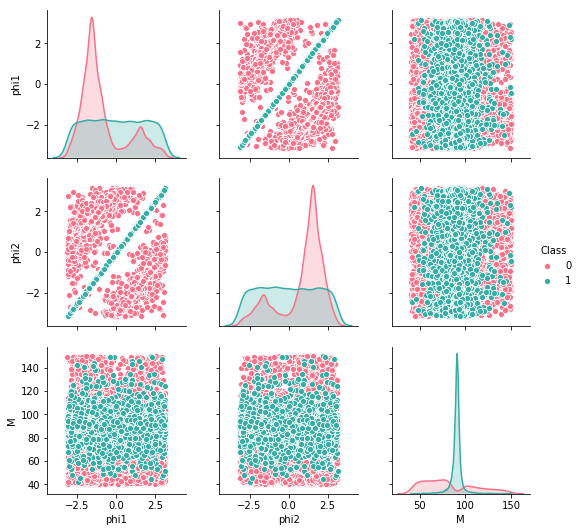

In [4]:
import seaborn as sns
Dataset = pd.read_csv('ZTraining_CollBack.csv')
sns_plot = sns.pairplot(Dataset, hue = 'Class', palette="husl", vars=['phi1','phi2','M'])
sns_plot.savefig("4-Momenta-M.png")

In [5]:
class_num = np.array(labels)
features = features.T

In [6]:
print("\n Generating training and test data...")
x_train = np.concatenate((
            features[:(samples_class-2300)],
            features[samples_class:(2*samples_class-2300)]),
            axis=0)
x_test = np.concatenate((
            features[(samples_class-2300):samples_class],
            features[(2*samples_class-2300):2*samples_class]),
            axis=0)

y_train = np.concatenate((
            class_num[:(samples_class-2300)],
            class_num[samples_class:(2*samples_class-2300)]),
            axis=0)
y_test = np.concatenate((
            class_num[(samples_class-2300):samples_class],
            class_num[(2*samples_class-2300):2*samples_class]),
            axis=0)

print("\n Total samples:    {} ".format(len(labels)))
print("\n Training samples: {} ".format(len(y_train)))
print("\n Test samples:     {} ".format(len(y_test)))
print(x_train[1])


 Generating training and test data...

 Total samples:    23000 

 Training samples: 18400 

 Test samples:     4600 
[-2.7159 -2.7159 93.6924]


In [7]:
np.random.shuffle(x_train)
np.random.shuffle(y_train)
np.random.shuffle(x_test)
np.random.shuffle(y_test)
print(x_train[1])

[7.59000e-02 7.59000e-02 9.46246e+01]


In [8]:
#import seaborn as sns
#Dataset = pd.read_csv('ZTraining_CollBack.csv')
#sns_plot = sns.pairplot(Dataset, hue = 'Class', palette="husl", vars=['E1','px1','py1','pz1','pt1','eta1','phi1',
#                                                                      'E2','px2','py2','pz2','pt2','eta2','phi2',
#                                                                      'M'])
#sns_plot.savefig("4-Momenta-M.png")

In [9]:
#===============================================================================
#======================== Model Building =======================================
#===============================================================================
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

epochs = 5
num_features = 3
num_classes = 2
batch_size = 64

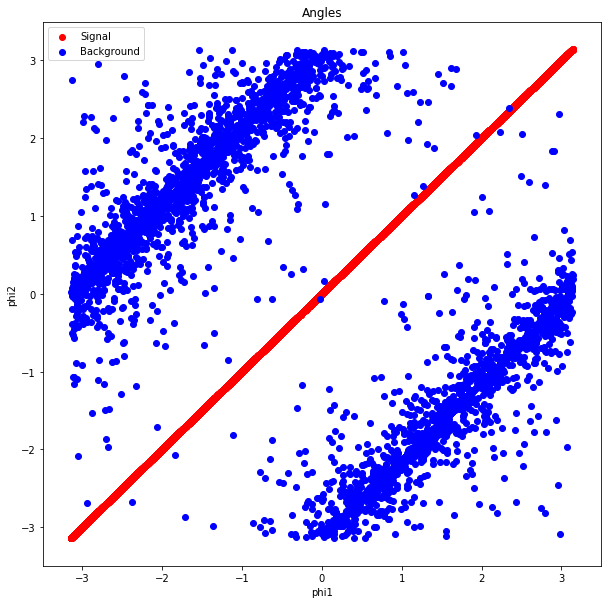

In [10]:
plt.figure(figsize=(10,10))
plt.scatter(features[:11500,0],features[0:11500,1], color='red',label='Signal')
plt.scatter(features[11501:23000,0],features[11501:23000,1], color='blue',label='Background')
plt.xlabel('phi1')
plt.ylabel('phi2')
plt.title('Angles')
plt.legend(loc='best')
plt.show()

In [12]:
# Build model
print("\n Building model...")
model = tf.keras.models.sequential()
model.add(tf.keras.flatten)
model.add(Dense(256, input_shape=(3,), activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))

model.add(Dense(num_classes,activation=tf.nn.softmax))

model.save('ZSignal_CNN.model')



print("\n Compiling model...")
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='Adam',
              metrics=['accuracy'])


print(model.summary())

print("\n Fitting model...")
history = model.fit(x_train, y_train, epochs = epochs, batch_size = batch_size, validation_data = (x_test, y_test))


 Building model...

 Compiling model...
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 256)               1024      
_________________________________________________________________
dense_6 (Dense)              (None, 512)               131584    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_8 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_9 (Dense)              (None, 2)                 514       
Total params: 527,106
Trainable params: 527,106
Non-trainable params: 0
_____________________________

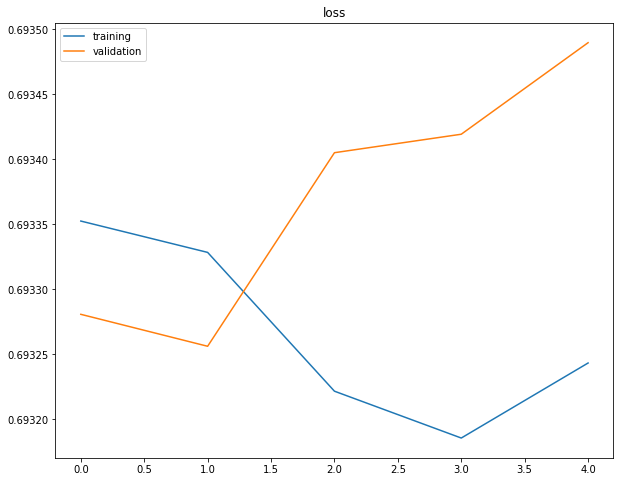

In [13]:
plt.figure(figsize=(10,8))
plt.plot(history.epoch,history.history['loss'], label='training')
plt.plot(history.epoch,history.history['val_loss'], label='validation')
plt.title('loss')
plt.legend(loc='best')
plt.show()

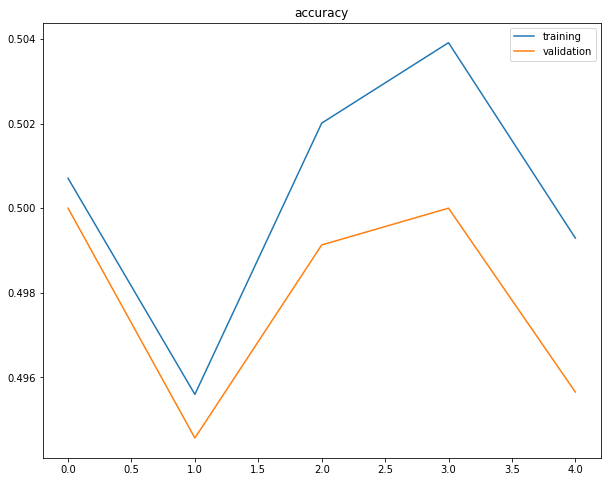

In [14]:
plt.figure(figsize=(10,8))
plt.plot(history.epoch,history.history['acc'], label='training')
plt.plot(history.epoch,history.history['val_acc'], label='validation')
plt.title('accuracy')
plt.legend(loc='best')
plt.show()

In [15]:
model = tf.keras.models.load_model('ZSignal_CNN.model')
#prediction = model.predict([-6.56495127e-03  2.04224273e-02  9.99769886e-01])
print(x_train[2])

[-0.54606877  0.83774035]


In [18]:
k = np.array([[-0.54606877,  0.83774035]])
print(k.shape)

(1, 2)


In [19]:
prediction = model.predict(k)
print(categories[int(prediction[0][0])])

Background
